In [26]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras import models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

<h1>Loading The data</h1>

<h2>Reading CSV Files</h2>

In [27]:
test_images = pd.read_csv('/kaggle/input/datasettest/csvTestImages 3360x1024.csv', header=None)
test_label= pd.read_csv('/kaggle/input/datasettest/csvTestLabel 3360x1.csv', header=None)-1

train_images =  pd.read_csv('/kaggle/input/datasettest/csvTrainImages 13440x1024.csv', header=None) 
train_label = pd.read_csv('/kaggle/input/datasettest/csvTrainLabel 13440x1.csv', header=None)-1

<h1>Analyzing Data</h1>

In [28]:
print("Training set shape:", train_images.shape)
print("Testing set shape:", test_images.shape)

Training set shape: (13440, 1024)
Testing set shape: (3360, 1024)


In [29]:
# Find the unique numbers from the train labels
classes = np.unique(train_label)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  28
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]


<h1>Data Preprocessing</h1>

In [30]:
image_size = (32, 32, 3)  # Change the size to (32, 32, 3)

# Reshape and convert to RGB
train_images = np.repeat(train_images.values.reshape(-1, *image_size[:2], 1), 3, axis=-1)
test_images = np.repeat(test_images.values.reshape(-1, *image_size[:2], 1), 3, axis=-1)

train_images.shape, test_images.shape

((13440, 32, 32, 3), (3360, 32, 32, 3))

The image size modification and conversion to RGB format are performed because DenseNet, the model being used, expects input images in RGB format (with three color channels). This adaptation ensures compatibility with DenseNet's input requirements.

The code modifies the image size to (32, 32, 3) and then reshapes and replicates grayscale images to create RGB images for both the training and testing datasets. The resulting shapes of the modified datasets are displayed as '(number_of_samples, 32, 32, 3)'.

In [31]:
train_images = train_images.astype('float32')
test_images  = test_images.astype('float32')

In [32]:
# Change the labels from categorical to one-hot encoding
train_label_one_hot = to_categorical(train_label)
test_label_one_hot = to_categorical(test_label)

# Display the change for category label using one-hot encoding
print('Original label:', train_label.iloc[0].values[0])
print('After conversion to one-hot:', train_label_one_hot[0])

Original label: 0
After conversion to one-hot: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [33]:
print('Original label:', train_label.iloc[9].values[0])
print('After conversion to one-hot:', train_label_one_hot[9])

Original label: 1
After conversion to one-hot: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


<h1>Data Visualization</h1>

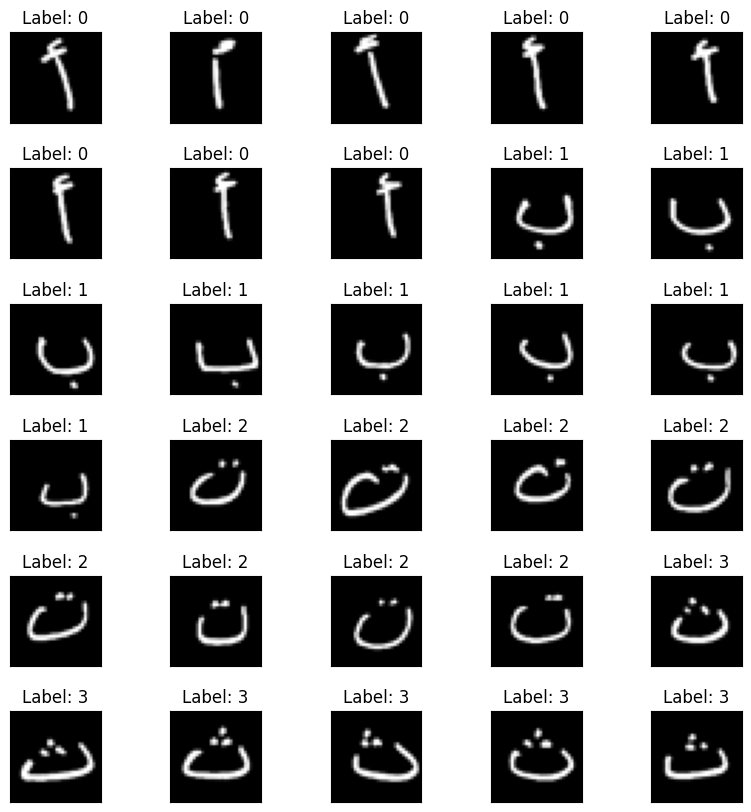

In [34]:
# Display a few images from the training set
plt.figure(figsize=(10, 10))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i, :, :, 0].T, cmap='gray')  # Display the first channel (grayscale)
    plt.title(f"Label: {train_label.iloc[i, 0]}")
    plt.subplots_adjust(hspace=0.5)

plt.show()

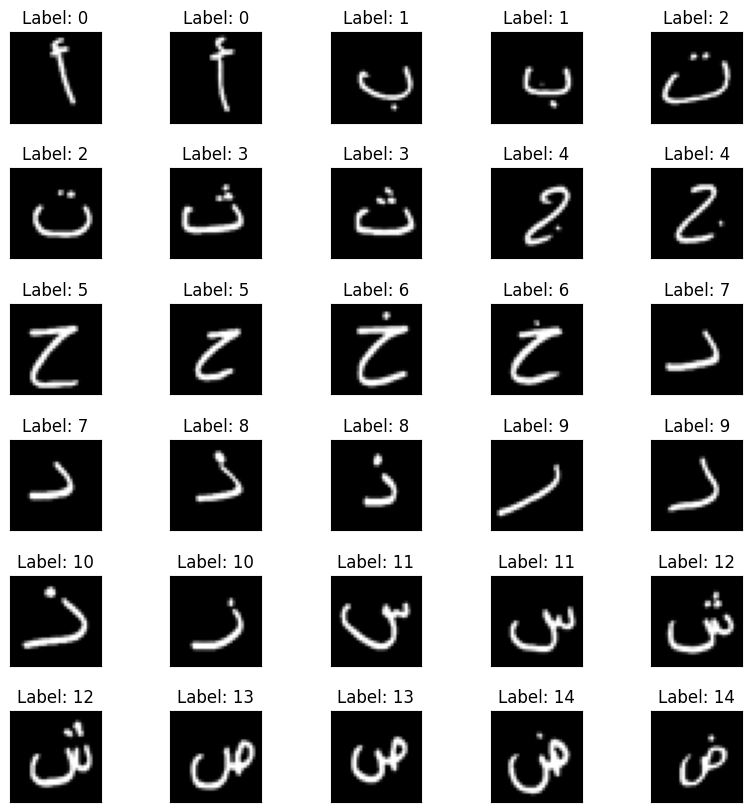

In [35]:
# Display a few images from the training set
plt.figure(figsize=(10, 10))
for i in range(30):
    plt.subplot(6, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i, :, :, 0].T, cmap='gray')  # Display the first channel (grayscale)
    plt.title(f"Label: {test_label.iloc[i, 0]}")
    plt.subplots_adjust(hspace=0.5)

plt.show()

<h1>Data Augmentation</h1>

In [36]:
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range = 0.2,
)


The training data experienced the same data augmentation process, with the incorporation of an extra shear range of 0.2.

<h1>The Network</h1>

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, ReLU, Activation, InputLayer
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
from tensorflow.keras.models import clone_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import DenseNet121
import tensorflow as tf

In [38]:
epochs = 80
batch_size = 120

<h1>Using DenseNet Architecture</h1>

In [39]:
from keras import regularizers

# Create the model
model = Sequential()

# Add DenseNet121 base model
model.add(DenseNet121(include_top=False, input_shape=(32, 32, 3)))

# Global Average Pooling layer
model.add(GlobalAveragePooling2D())

# Dense layer with L2 regularization
model.add(Dense(28, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

This code defines a neural network model using DenseNet121 as the base model, configured for an input size of 32x32x3. The images have been preprocessed to include three identical channels. An additional Global Average Pooling layer is added for dimensionality reduction. The output layer with 28 neurons (representing characters) incorporates L2 regularization to mitigate overfitting. 

<h1>Compiling the Model</h1>

In [40]:
# Compile the model with Adam optimizer and learning rate 0.001
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

The model is compiled using the Adam optimizer with learning rate = 0.001 and categorical crossentropy loss for training.

In [41]:
# Display the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 1, 1, 1024)        7037504   
                                                                 
 global_average_pooling2d_1  (None, 1024)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 28)                28700     
                                                                 
Total params: 7066204 (26.96 MB)
Trainable params: 6982556 (26.64 MB)
Non-trainable params: 83648 (326.75 KB)
_________________________________________________________________


<h1>Training and Evaluating the Model with Early stopping</h1>

In [42]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
model_history = model.fit(datagen.flow(train_images, train_label_one_hot, batch_size=batch_size),
                          epochs=epochs,
                          batch_size=batch_size,
                          verbose=1,
                          validation_data=(test_images, test_label_one_hot),
                          callbacks=[early_stopping])

Epoch 1/80
112/112 [==============================] - 64s 107ms/step - loss: 1.2477 - accuracy: 0.7289 - val_loss: 1.8672 - val_accuracy: 0.5086
Epoch 2/80
112/112 [==============================] - 10s 93ms/step - loss: 0.4680 - accuracy: 0.9115 - val_loss: 0.9114 - val_accuracy: 0.7753
Epoch 3/80
112/112 [==============================] - 10s 89ms/step - loss: 0.3298 - accuracy: 0.9327 - val_loss: 0.4538 - val_accuracy: 0.8887
Epoch 4/80
112/112 [==============================] - 10s 90ms/step - loss: 0.2679 - accuracy: 0.9414 - val_loss: 0.4147 - val_accuracy: 0.9003
Epoch 5/80
112/112 [==============================] - 11s 95ms/step - loss: 0.2194 - accuracy: 0.9529 - val_loss: 0.2729 - val_accuracy: 0.9369
Epoch 6/80
112/112 [==============================] - 10s 88ms/step - loss: 0.1993 - accuracy: 0.9548 - val_loss: 0.3884 - val_accuracy: 0.9024
Epoch 7/80
112/112 [==============================] - 10s 87ms/step - loss: 0.1859 - accuracy: 0.9577 - val_loss: 0.4460 - val_accuracy

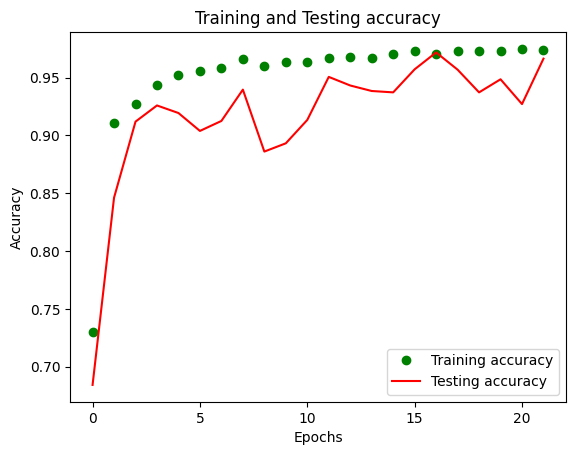

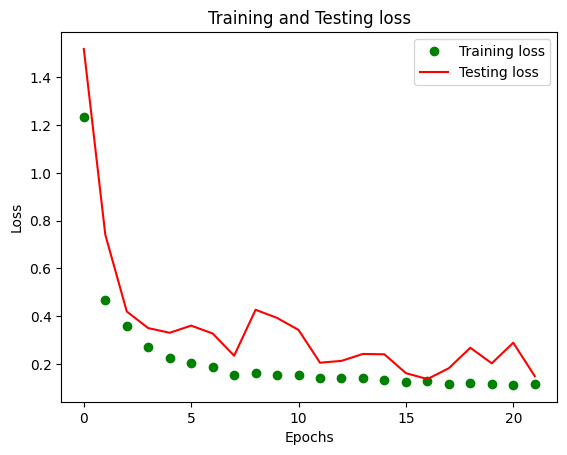

In [18]:
training_acc = model_history.history['accuracy']
testing_accuracy = model_history.history['val_accuracy']
training_loss = model_history.history['loss']
testing_loss = model_history.history['val_loss']
epochs = range(len(testing_accuracy))

# Plotting accuracy
plt.plot(epochs, training_acc, 'go', label='Training accuracy')  # Change color to green
plt.plot(epochs, testing_accuracy, 'r', label='Testing accuracy')   # Change color to red
plt.title('Training and Testing accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss
plt.figure()
plt.plot(epochs, training_loss, 'go', label='Training loss')  
plt.plot(epochs, testing_loss, 'r', label='Testing loss')       
plt.title('Training and Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<h1>Predict Label</h1>

<h2>Predicting Correct Labels</h2>

In [19]:
test_label_1d = test_label.squeeze()

105/105 [==============================] - 5s 11ms/step
Found 3258 correct labels


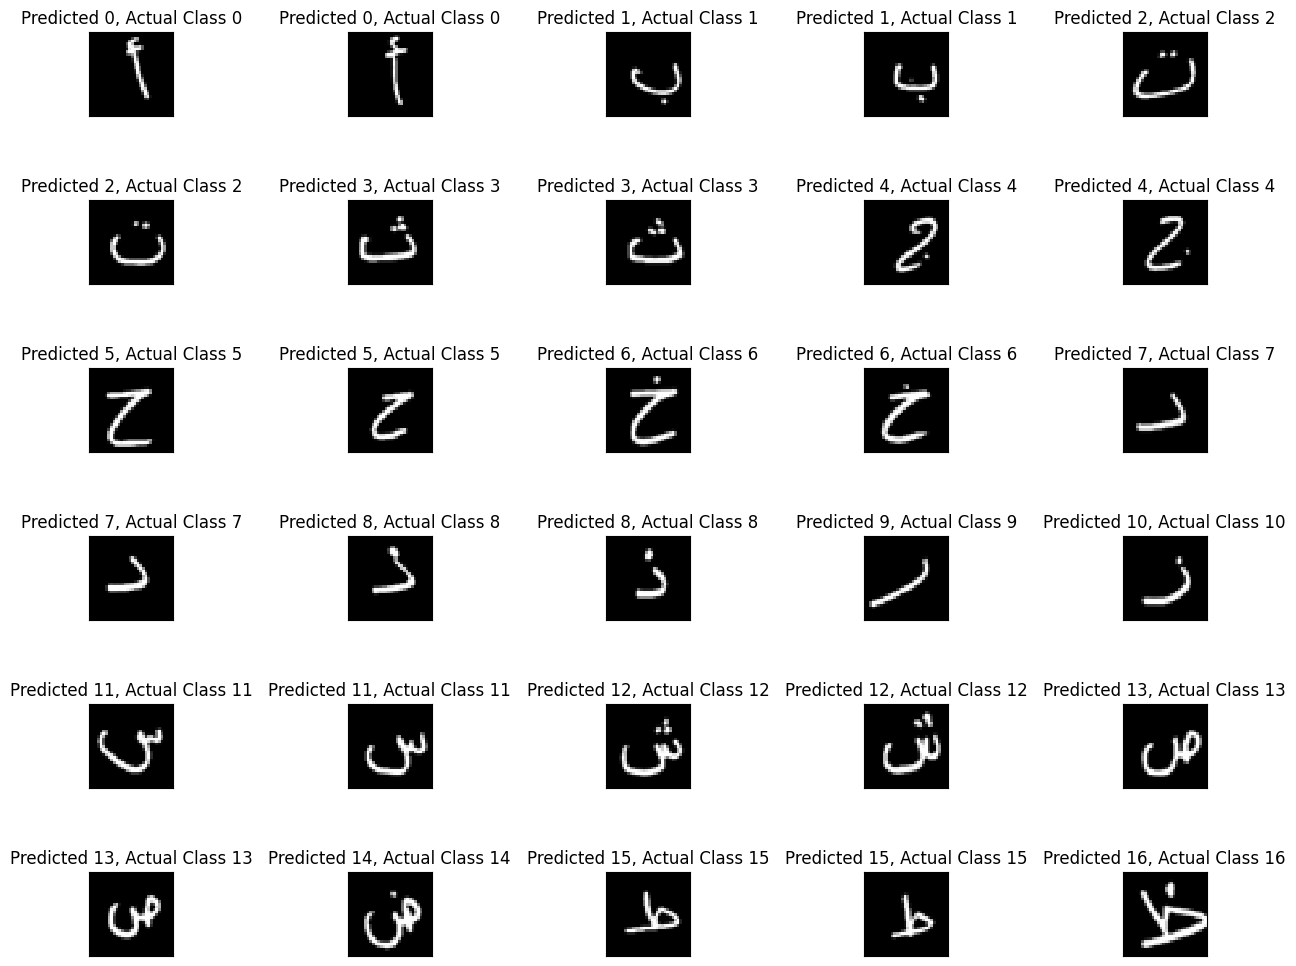

In [20]:
predicted_classes= model.predict(test_images)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

correct = np.where(predicted_classes == test_label_1d)[0]
print("Found %d correct labels" % len(correct))

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=1, wspace=1)

for i, idx in enumerate(correct[:30]):
    plt.subplot(6,5, i + 1)

    plt.imshow(test_images[idx, :, :, 0].T, cmap='gray', interpolation='none')
    plt.title("Predicted {}, Actual Class {}".format(predicted_classes[idx], test_label_1d[idx]))
    plt.xticks([]) 
    plt.yticks([]) 

plt.show()

<h2>Predicting Incorrect Labels</h2>

Found 102 incorrect labels


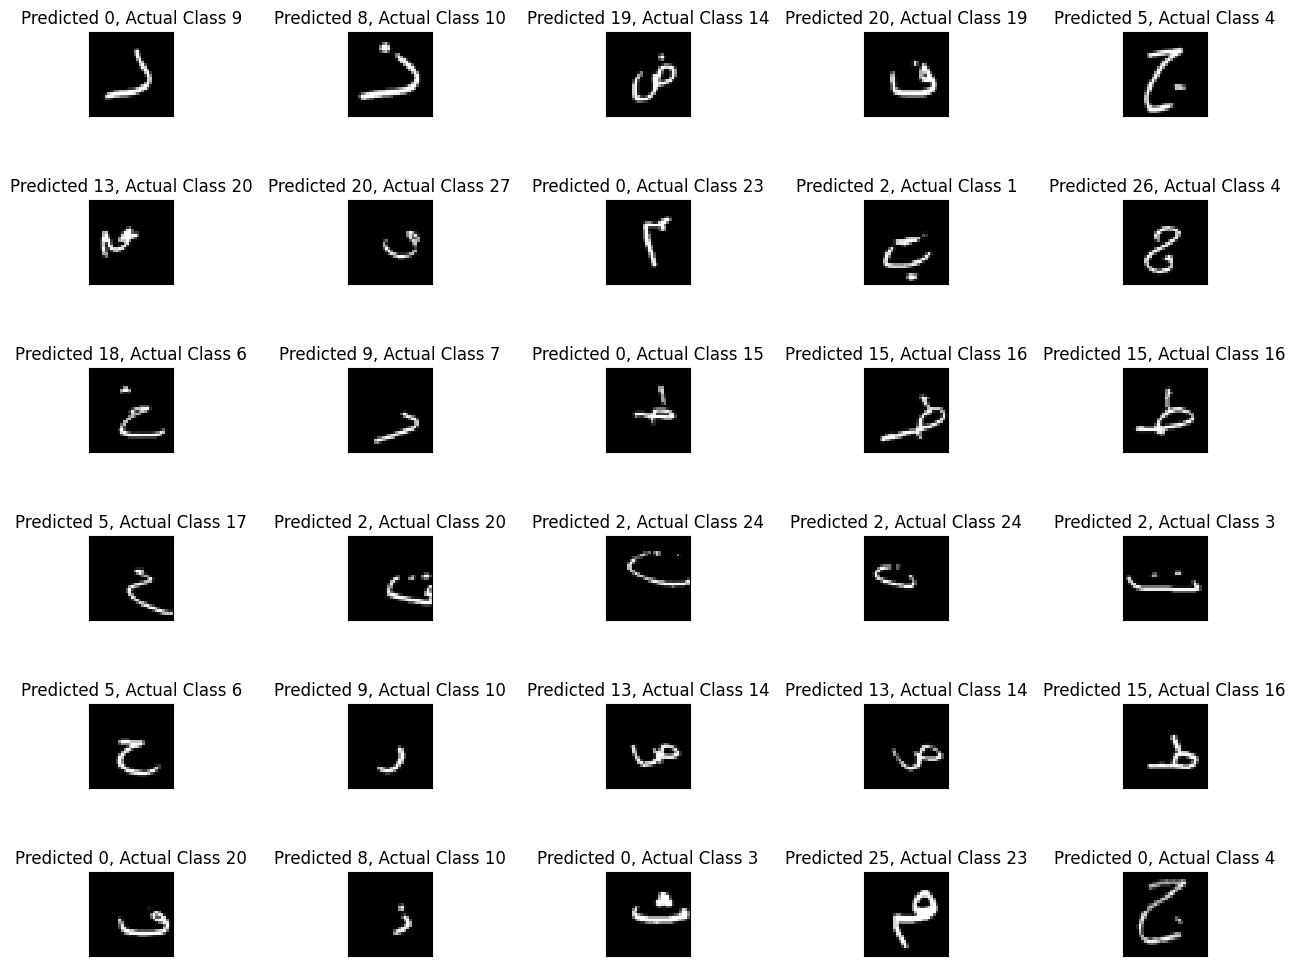

In [21]:
incorrect = np.where(predicted_classes != test_label_1d)[0]
print("Found %d incorrect labels" % len(incorrect))

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=1, wspace=1)

for i, idx in enumerate(incorrect[:30]):
    plt.subplot(6,5, i + 1) 

    plt.imshow(test_images[idx, :, :, 0].T, cmap='gray', interpolation='none')
    plt.title("Predicted {}, Actual Class {}".format(predicted_classes [idx], test_label_1d[idx]))
    plt.xticks([]) 
    plt.yticks([]) 

plt.show()

This model exhibits fewer misclassifications compared to Task 1 and Task 2. The advantage lies in leveraging popular architectures designed to automatically learn hierarchical features from input data. The lower layers capture basic features like edges, progressing to deeper layers capturing more intricate patterns, enhancing performance across diverse computer vision tasks.